Exercises

1.1

Implement K-means described in k-means-clustering-Wikipedia.2002271236.pdf.
Use the one denoted by naive algorithm in the document.

Translation: k-means-clustering-Wikipedia.2002271236.pdf にある K平均法(naive algorithm)を実装せよ．

1.2

Plot 100 two-dimensional data points and plot by the following code:

ntras = 100;
thets = rand(1,ntras)*(2*pi); 
radis = rand(1,ntras)*0.1+1.0; 
X = [cos(thets);sin(thets)]*diag(radis); 
plot( X(1,:), X(2,:), 'ko' );
csvwrite( 'k.X.csv', X' ); 

1.3

Set K=2 and record the value of Within-cluster sum of squares (WCSS). Plot WCSS against iteration numbers. Verify that the curve is monotonically decreased.

Translation: K=2 とし，Within-cluster sum of squares (WCSS) の値を記録しろ．横軸反復数，縦軸 WCSS として，グラフを描け．ヒント（関数 plot）．単調減少していることを確かめよ．

1.4

Plot K-means with K=2,3,4. Use different colors for different clusters. Use of function print_eps_and_png is recommended to generate figures.

Translation: クラスタ数 2, 3, 4 の場合で K平均法を適用しろ．
クラスタリング結果をもとに色付けしてプロットせよ．

1.5

Create the following function. The function applies K-means five times with different initial solutions. The solutions are chosen randomly. Find the minimal one from the five WCSS, and return the assignment associated with the minimal WCSS.

Translation: 初期割当をランダムに選んで，５回 K 平均法を行い，最も J(U,V) が小さい結果を最終結果とするような関数を作れ．


# K-means法
データポイントをいくつのクラスタに（ｋ個）分割するかを決定する。

与えられたデータポイントからｋ個の中心点をランダムに決定する。

各データポイントを最も近い中心点に割り当てる。

各クラスタに属するデータポイントの重心を計算し、そのクラスタの中心点を重心に更新する。

データポイントから最も近い中心点に割り当て直し、データポイントが属するクラスタを更新する。

中心点の更新とクラスタの更新を繰り返し、中心点の変化が一定以下になるか、一定の回数更新したら停止する。

初期位置をランダムに設定した場合、収束までに時間がかかったり性能が出ないことがある。初期位置をなるべく適切に選択するための方法として、K-means++がある。

## k-means++
初期位置の決定の際に、すべての中心点どうしが遠いところに配置されるような確率が高くなるようにする手法。

ある中心点を定めたら、ある点が中心点として選ばれる確率を、その点と中心点の距離の２乗を、すべての点との距離の２乗で割った値とする。

これによって、既に定まった中心点から外れたところに新しい中心点が配置されやすくなる。確率的とするのは外れ値への対処のため。



クラスタの値を適切に決定するための方法として、エルボー法がある。グループ中心からの距離を小さくする、というアイデアでクラスタリングを行っているため、この距離の和が小さくなれば良い（クラスタ内誤差平方和（SSE）がゼロに近づけばよい）と、単純に決定することはできず、例えばクラスタ数がサンプル数と同じだけあればSSE=0となるが、意味のないクラスタリングになる。
## エルボー法
クラス数を増やしていき、急激にSSEが低下するところを最適なクラス数とする、というアイデア。エルボーは肘の意味で、グラフが腕のような形になったとき、ちょうど肘の部分を採用することから。

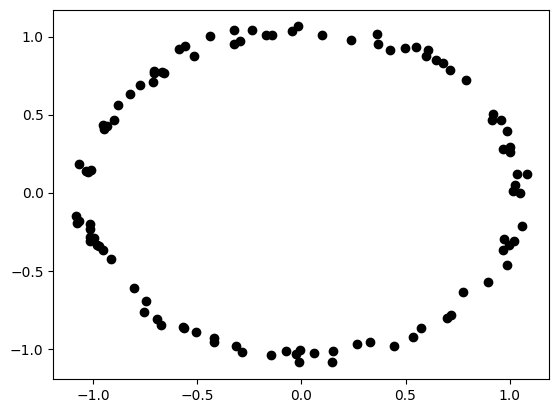

In [1]:

import numpy as np
import matplotlib.pyplot as plt

ntras = 100
thets = np.random.rand(ntras) * (2 * np.pi)
radis = np.random.rand(ntras) * 0.1 + 1.0
X = np.array([np.cos(thets), np.sin(thets)]) * radis
plt.plot(X[0,:], X[1, :],'ko')
plt.show()

np.savetxt('kX.csv', X.T, delimiter=',')

#import
import pandas as pd
import random
import seaborn as sns
import matplotlib.ticker
from matplotlib import pyplot as plt
from typing import List

#Algorithm implementation
#A function that calculates the distance from a point to the mean
def distance(l1: List[float], l2: List[float]) -> float:
    assert len(l1) == len(l2)
    return sum((a1 - a2)**2 for a1, a2 in zip(l1, l2))

#A function that receives a data frame and the number of clusters as input
def clustering(df: pd.DataFrame, n_clusters: int) -> List[int]:
    columns = df.columns
    
    # Assignment of random coordinates to cluster centers
    coord_means = [[random.random() for _ in range(len(columns))] for _ in range(n_clusters)]
    close_mean1 = pd.Series([-1 for _ in range(df.shape[0])])
    close_mean2 = pd.Series([-2 for _ in range(df.shape[0])])
    
    #The learning process stops when not a single point has changed its cluster during the iteration
    while list(close_mean1) != list(close_mean2):
        close_mean1 = close_mean2
        close_mean2 = pd.Series([-1 for _ in range(df.shape[0])])
        
        for i in range(df.shape[0]):
            dist = []
            for coord_mean in coord_means:
                dist.append(distance(list(df.iloc[i,]), coord_mean))
            close_mean2[i] = dist.index(min(dist))
        
        for j, coord_mean in enumerate(coord_means):
            if len(df[close_mean2 == j]) != 0:
                for k, column in enumerate(columns):
                    coord_mean[k] = df.loc[close_mean2 == j, column].mean()
            else:
                for k, column in enumerate(columns):
                    coord_mean[k] = random.random()

    return close_mean2


In [5]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.ticker
from matplotlib import pyplot as plt
from typing import List
import numpy as np

def distance(l1: np.ndarray, l2: np.ndarray) -> float:
    """ ユークリッド距離の二乗を計算 """
    return np.sum((l1 - l2) ** 2)

def clustering(df: pd.DataFrame, n_clusters: int) -> List[int]:
    """ K-means クラスタリングの簡易実装 """
    # 初期クラスタ中心の設定
    coord_means = [df.sample(n=1, random_state=random.randint(0, 100)).values.flatten() for _ in range(n_clusters)]
    
    # 前回のクラスタとの変化をチェック
    prev_assignment = np.full(df.shape[0], -1)
    current_assignment = np.full(df.shape[0], -2)
    
    while not np.array_equal(prev_assignment, current_assignment):
        prev_assignment = current_assignment.copy()
        
        # 各データポイントに最も近いクラスタを割り当て
        distances = np.zeros((df.shape[0], n_clusters))
        for i, coord_mean in enumerate(coord_means):
            distances[:, i] = np.linalg.norm(df.values - coord_mean, axis=1)  # 計算効率を改善

        current_assignment = np.argmin(distances, axis=1)
        
        # クラスタ中心の再計算
        for j in range(n_clusters):
            cluster_points = df.iloc[current_assignment == j]
            if not cluster_points.empty:
                coord_means[j] = cluster_points.mean().values.flatten()

    return current_assignment.tolist()

# データの初期化とクラスタリング
random.seed(1)
df1 = pd.DataFrame(X)  # Xは予め定義されているデータ

# クラスタ数ごとのクラスタリング結果を追加
for i in range(1, 11):
    df1[i] = clustering(df1, i)

# 各クラスタリング結果のユニークなクラスタ数を確認
print(df1.iloc[:, 13:].nunique())

# クラスタリング結果の評価
n_clusters = []
sum_dist = []

# ここで評価に必要な計算を効率化
for i in range(1, 11):
    clusters = sorted(df1[i].unique())
    total_distance = 0

    # クラスタごとの計算を一度に処理
    for cluster in clusters:
        # クラスタ内の中心を計算
        coord = df1.loc[df1[i] == cluster, :'Proline'].mean().values

        # 各データポイントとの距離を計算
        cluster_points = df1.loc[df1[i] == cluster]
        
        # 修正: df1の最初の2列とcoordを合わせるため、長さを一致させる
        for ind in cluster_points.index:
            total_distance += distance(df1.iloc[ind, :2].values, coord[:2])  # coordを最初の2つの特徴量に制限
    
    n_clusters.append(len(clusters))
    sum_dist.append(total_distance)

# n_clusters と sum_dist の結果を確認
print(n_clusters)
print(sum_dist)


13    2
14    2
15    2
16    2
17    2
     ..
95    2
96    2
97    2
98    2
99    2
Length: 87, dtype: int64
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[np.float64(0.08585942987036571), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


In [6]:
import pandas as pd
import random
import numpy as np
from typing import List

def distance_np(l1: np.ndarray, l2: np.ndarray) -> float:
    return np.linalg.norm(l1 - l2)

def clustering(df: pd.DataFrame, n_clusters: int) -> List[int]:
    columns = df.columns
    data = df.values
    n_samples, n_features = data.shape

    # クラスタ中心の初期化 (データ範囲内)
    coord_means = data[np.random.choice(n_samples, n_clusters, replace=False)]

    close_mean1 = np.full(n_samples, -1)
    close_mean2 = np.full(n_samples, -2)

    while not np.array_equal(close_mean1, close_mean2):
        close_mean1 = close_mean2.copy()

        # 最近のクラスタ中心を割り当て
        for i in range(n_samples):
            distances = [distance_np(data[i], coord) for coord in coord_means]
            close_mean2[i] = np.argmin(distances)

        # クラスタ中心の再計算
        for j in range(n_clusters):
            cluster_points = data[close_mean2 == j]
            if len(cluster_points) > 0:
                coord_means[j] = cluster_points.mean(axis=0)
            else:
                coord_means[j] = data[np.random.choice(n_samples)]

    return close_mean2.tolist()


In [10]:

import pandas as pd
import random
import seaborn as sns
import matplotlib.ticker
from matplotlib import pyplot as plt
from typing import List

#Algorithm implementation:

#Distance function:
   # A function that calculates the distance from a point to the mean.

def distance(l1: List[float], l2: List[float]) -> float:
    assert len(l1) == len(l2)
    return sum((a1 - a2)**2 for a1, a2 in zip(l1, l2))

    #Clustering function:
    #A function that receives a DataFrame and the number of clusters as input.

def clustering(df: pd.DataFrame, n_clusters: int) -> List[int]:
    columns = df.columns
    
    # Assignment of random coordinates to cluster centers
    coord_means = [[random.random() for _ in range(len(columns))] for _ in range(n_clusters)]
    close_mean1 = pd.Series([-1 for _ in range(df.shape[0])])
    close_mean2 = pd.Series([-2 for _ in range(df.shape[0])])
    
    # The learning process stops when not a single point has changed its cluster during the iteration
    while list(close_mean1) != list(close_mean2):
        close_mean1 = close_mean2
        close_mean2 = pd.Series([-1 for _ in range(df.shape[0])])
        
        # Finding the nearest cluster center for each point
        for i in range(df.shape[0]):
            dist = []
            for coord_mean in coord_means:
                dist.append(distance(list(df.iloc[i,]), coord_mean))
            close_mean2[i] = dist.index(min(dist))
        
        # Calculation of new coordinates for cluster centers
        for j, coord_mean in enumerate(coord_means):
            if len(df[close_mean2 == j]) != 0:
                for k, column in enumerate(columns):
                    coord_mean[k] = df.loc[close_mean2 == j, column].mean()
            else:
                for k, column in enumerate(columns):
                    coord_mean[k] = random.random()
    
    return close_mean2

#このコードは、distance 関数で2つの点間の距離を計算し、clustering 関数でK-meansアルゴリズムを実装しています。clustering は、データフレームとクラスター数を受け取り、ランダムに割り当てた初期クラスタセンターを使ってクラスタリングを行います。

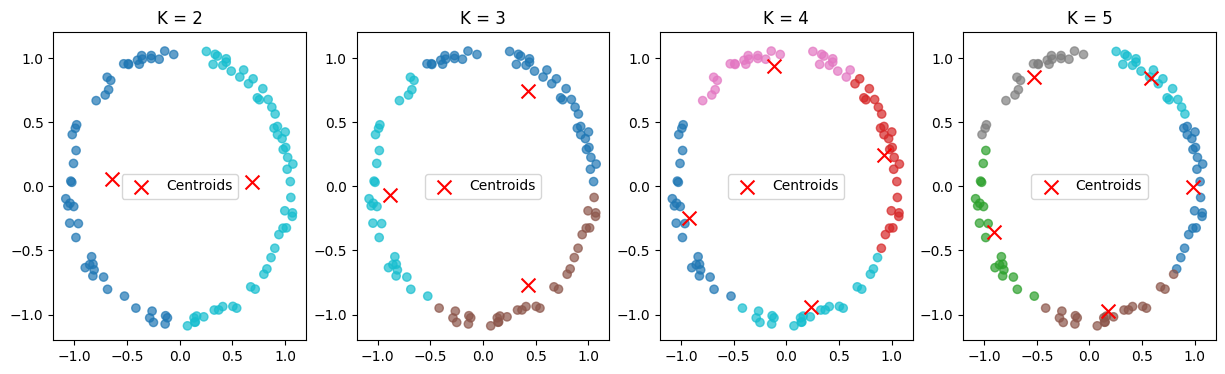

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

# クラスタ数のリスト
cluster_list = [2, 3, 4, 5]

# ランダムシード固定
np.random.seed(42)

# データ生成
ntras = 100
thets = np.random.rand(ntras) * (2 * np.pi)
radis = np.random.rand(ntras) * 0.1 + 1.0
X = np.array([np.cos(thets), np.sin(thets)]) * radis
X = X.T  # 転置して (x, y) の形に

# ユークリッド距離
def distance(a, b):
    return np.linalg.norm(a - b)

# K-means クラスタリング
def kmeans_clustering(data, k, max_iter=100):
    n_samples, n_features = data.shape
    # クラスタ中心の初期化（ランダムなデータ点を選択）
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    labels = np.zeros(n_samples, dtype=int)

    for _ in range(max_iter):
        new_labels = np.array([
            np.argmin([distance(point, centroid) for centroid in centroids])
            for point in data
        ])

        if np.array_equal(labels, new_labels):
            break  # 収束したら終了

        labels = new_labels

        # 新しいクラスタ中心を計算
        for i in range(k):
            cluster_points = data[labels == i]
            if len(cluster_points) > 0:
                centroids[i] = cluster_points.mean(axis=0)

    return labels, centroids

# クラスタリングの可視化
fig, axes = plt.subplots(1, len(cluster_list), figsize=(15, 4))

for idx, k in enumerate(cluster_list):
    labels, centroids = kmeans_clustering(X, k)

    axes[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', alpha=0.7)
    axes[idx].scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label="Centroids")
    axes[idx].set_title(f'K = {k}')
    axes[idx].set_xlim([-1.2, 1.2])
    axes[idx].set_ylim([-1.2, 1.2])
    axes[idx].legend()

plt.show()
